#
- What is the time period that the dataset covers?
-- date(max) - date(min)
- What is the overall revenue for that time?
-- sum (total_paid)
- Are there seasonal patterns in the evolution of sales?
-- there are, see bonus-challenge 3.6
- What are the most sold products?
-- nlargest, orderlines groupby sku, quantity(sum)
- What are the products that generate the most revenue?
-- nlargest, orderlines groupby sku, total_paid (quantity*unit_price)

- How products should be classified into different categories to simplify reports and analysis.
- What is the distribution of product prices across different categories.
- How many products are being discounted.
-- sum quantity where price != unit_price
- How big are the offered discounts as a percentage of the product prices.
-- (price-unit_price)/price
- How seasonality and special dates (Christmas, Black Friday) affect sales.
-- huge impact as to be seen in bonus-challenge 3.6 (seaborn)
- How could data collection be improved.
-- prevent userinput of multiple decimals when prompting numbers (has been the main issue when analysing data)
-- integrate a function to make sure date/time inputs are directly saved as datetime-data
-- harmonize SKUs in order to address the 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

filepath_1 = r"C:\Users\danie\Desktop\WBS.DataScience_Bootcamp\Week_3_Data_Cleaning\b_cl.csv"
filepath_2 = r"C:\Users\danie\Desktop\WBS.DataScience_Bootcamp\Week_3_Data_Cleaning\ol_cl.csv"
filepath_3 = r"C:\Users\danie\Desktop\WBS.DataScience_Bootcamp\Week_3_Data_Cleaning\o_cl.csv"
filepath_4 = r"C:\Users\danie\Desktop\WBS.DataScience_Bootcamp\Week_3_Data_Cleaning\p_cl.csv"
filepath_5 = r"C:\Users\danie\Desktop\WBS.DataScience_Bootcamp\Week_3_Data_Cleaning\orders.csv"

brands = pd.read_csv(filepath_1, sep = ",")
orderlines = pd.read_csv(filepath_2, sep = ",")
orders = pd.read_csv(filepath_3, sep = ",")
products = pd.read_csv(filepath_4, sep = ",")
orders_date = pd.read_csv(filepath_5, sep = ",")

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 1000)
pd.set_option('max_colwidth', 400)

b = brands.copy()
o = orders.copy()
ol = orderlines.copy()
p = products.copy()
o_date = orders_date.copy()


# Checking for time-delta

In [ ]:
o.info()

In [3]:
ol.date = pd.to_datetime(ol.date)
ol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   order_id          293983 non-null  int64         
 1   product_quantity  293983 non-null  int64         
 2   sku               293983 non-null  object        
 3   date              293983 non-null  datetime64[ns]
 4   unit_price_cl     293983 non-null  float64       
 5   total_price       293983 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 13.5+ MB


In [2]:
p.drop("desc", axis=1, inplace=True)
p.drop("type", axis =1, inplace=True)
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9946 entries, 0 to 9945
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sku       9946 non-null   object 
 1   name      9946 non-null   object 
 2   price     9946 non-null   float64
 3   short     9946 non-null   object 
 4   category  9946 non-null   object 
dtypes: float64(1), object(4)
memory usage: 388.6+ KB


In [4]:
ol_p = pd.merge(ol, p, how="inner", on="sku")
ol_p.head()

,order_id,product_quantity,sku,date,unit_price_cl,total_price,name,price,short,category
0,299539,1,OTT0133,2017-01-01 00:07:19,18.99,18.99,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 Black,34.99,OTT,Cases/ Device Protection
1,299603,1,OTT0133,2017-01-01 10:18:53,18.99,18.99,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 Black,34.99,OTT,Cases/ Device Protection
2,300713,1,OTT0133,2017-01-02 16:51:26,19.99,19.99,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 Black,34.99,OTT,Cases/ Device Protection
3,301432,1,OTT0133,2017-01-03 11:21:52,19.99,19.99,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 Black,34.99,OTT,Cases/ Device Protection
4,302307,1,OTT0133,2017-01-04 10:11:45,19.99,19.99,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 Black,34.99,OTT,Cases/ Device Protection


In [5]:
ol_p["datetime"] = ol_p.date
ol_p.date = ol_p.date.dt.date
ol_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285049 entries, 0 to 285048
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   order_id          285049 non-null  int64         
 1   product_quantity  285049 non-null  int64         
 2   sku               285049 non-null  object        
 3   date              285049 non-null  object        
 4   unit_price_cl     285049 non-null  float64       
 5   total_price       285049 non-null  float64       
 6   name              285049 non-null  object        
 7   price             285049 non-null  float64       
 8   short             285049 non-null  object        
 9   category          285049 non-null  object        
 10  datetime          285049 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 26.1+ MB


In [6]:
total_no_b = pd.merge(ol_p, o, how="inner", on="order_id")

In [7]:
total = pd.merge(total_no_b, b, how="inner", on="short")

In [8]:
total["price_diff"] = total.price - total.unit_price_cl
total["discount"] = (total.price_diff/total.price)*100

In [9]:
total.drop("state", axis=1, inplace=True)
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60326 entries, 0 to 60325
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          60326 non-null  int64         
 1   product_quantity  60326 non-null  int64         
 2   sku               60326 non-null  object        
 3   date              60326 non-null  object        
 4   unit_price_cl     60326 non-null  float64       
 5   total_price       60326 non-null  float64       
 6   name              60326 non-null  object        
 7   price             60326 non-null  float64       
 8   short             60326 non-null  object        
 9   category          60326 non-null  object        
 10  datetime          60326 non-null  datetime64[ns]
 11  total_paid        60326 non-null  float64       
 12  long              60326 non-null  object        
 13  price_diff        60326 non-null  float64       
 14  discount          6032

# general timeline for seasonality of sales

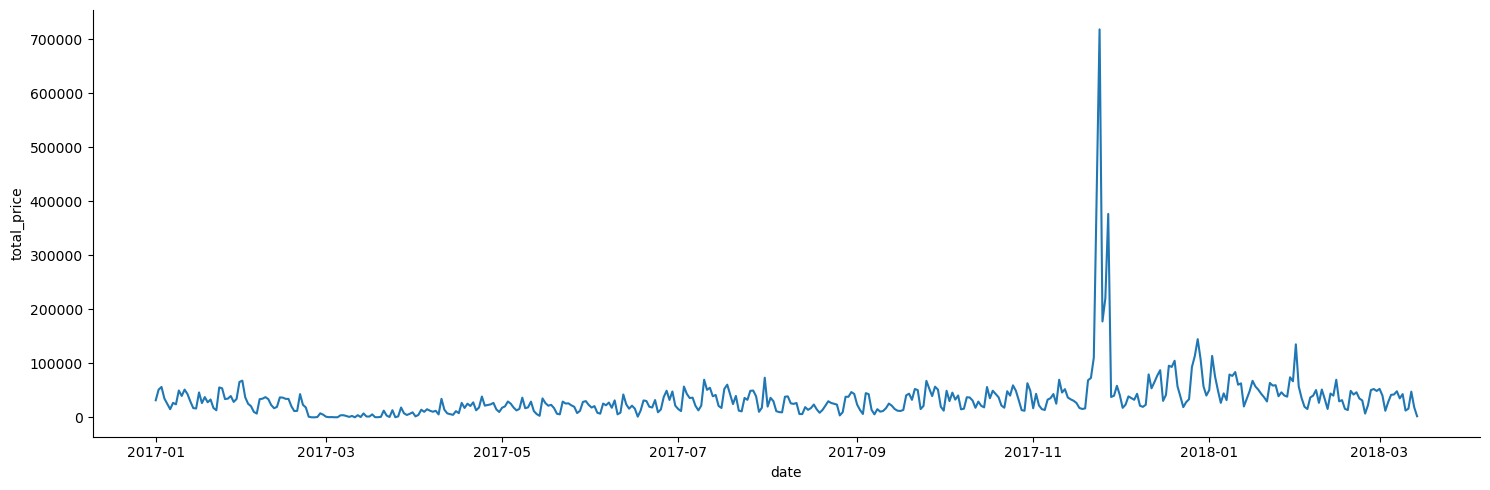

In [10]:
dist_sales = total.groupby("date").agg({"total_price": "sum"}).reset_index()
sns.relplot(data=dist_sales, x="date", y="total_price", kind="line", aspect=3)

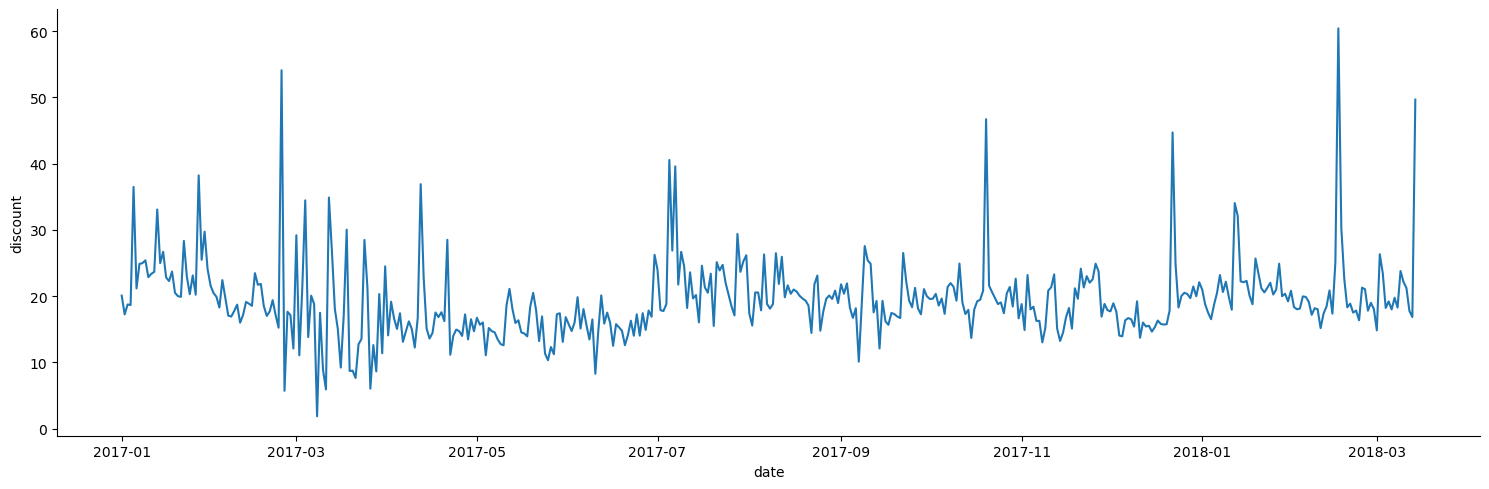

In [11]:
dist_discounts = total.groupby("date").agg({"discount": "mean"}).reset_index()
sns.relplot(data=dist_discounts, x="date", y="discount", kind="line", aspect=3)

In [10]:
total.discount.mean()

20.806684874691676

# cyberweek

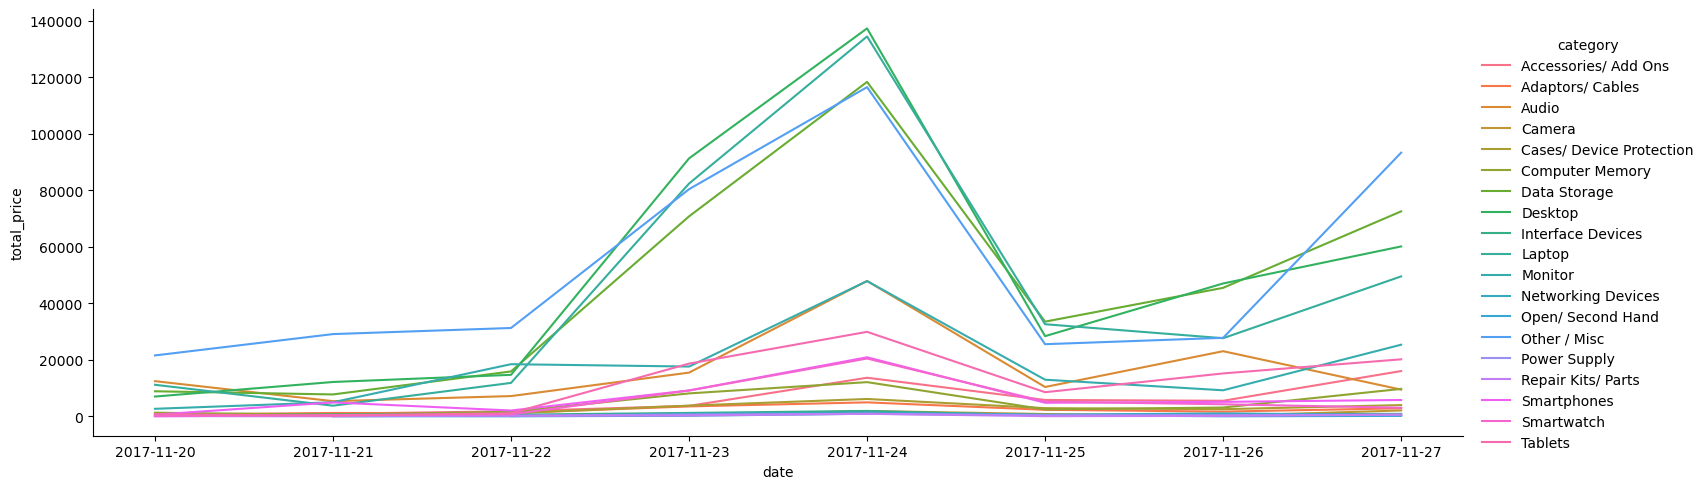

In [14]:
cyberweek = total[total.datetime.between("2017-11-20 00:00:00", "2017-11-27 23:59:59")]
cw = cyberweek.groupby(by=["category", "date"]).agg({"total_price": "sum"}).reset_index()
sns.relplot(data=cw, x="date", y="total_price", hue="category", aspect=3, kind="line")

# cyber monday

In [61]:
#how to access via total.date and not using datetime as a workaround?

#total[total.date == 2017-11-27]
#total[total.date == "2017-11-27"]
#total.loc[total.date == "2017-11-27", :]
cm = total[total.datetime.between("2017-11-27 00:00:00", "2017-11-27 23:59:59")]


,order_id,product_quantity,sku,date,unit_price_cl,total_price,name,price,short,category,datetime,total_paid,long,price_diff,discount,disc


In [54]:

total.groupby("date").agg({"total_price": "sum"}).sort_values("total_price").tail(7)

,total_price
date,
2018-01-31,135096.12
2017-12-28,144634.91
2017-11-25,177490.55
2017-11-26,220167.91
2017-11-27,376510.62
2017-11-23,417546.24
2017-11-24,718030.62


# christmas

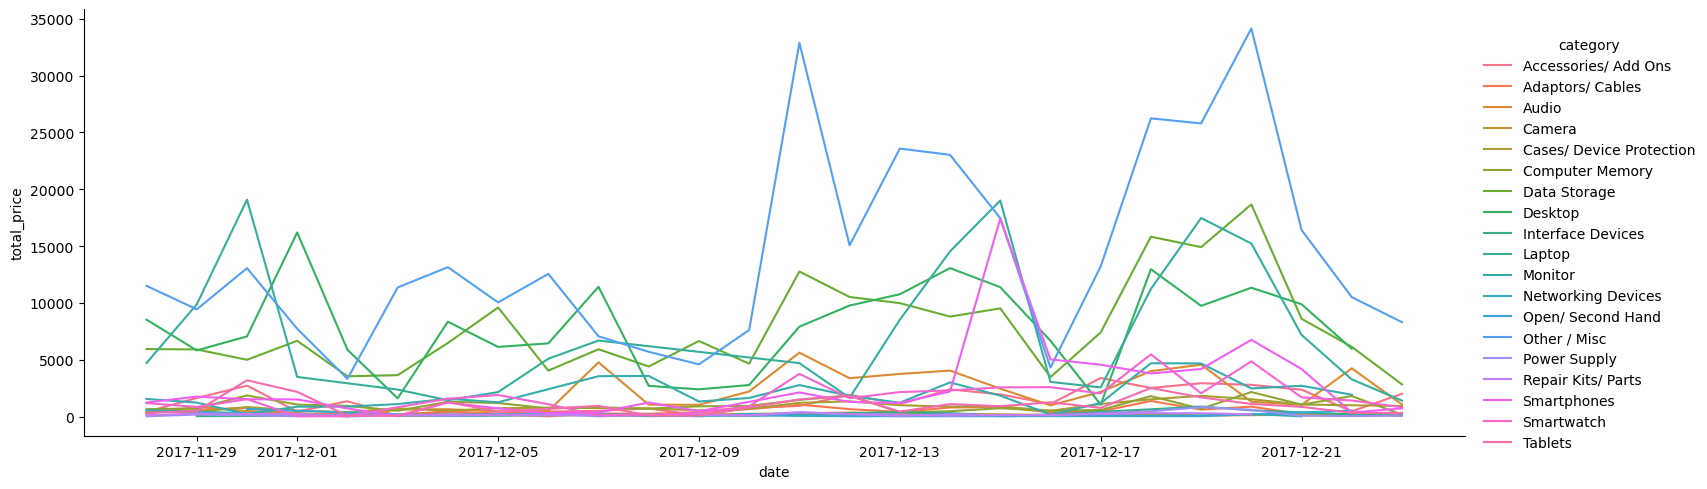

In [13]:
christmas = total[total.datetime.between("2017-11-28 00:00:00", "2017-12-23 23:59:59")]
xm = christmas.groupby(by=["category", "date"]).agg({"total_price": "sum"}).reset_index()
sns.relplot(data=xm, x="date", y="total_price", hue="category", aspect=3, kind="line")

# how many products are discounted

In [138]:
#total.price[total.price > total.unit_price_cl].count()
print(f"{((total.price[total.price > total.unit_price_cl].count()/total.price.count())*100).round(2)} percent of the productsales have been discounted")


93.1 percent of the productsales have been discounted


# representing how much revenue?

In [144]:
total.total_price[total.discount > 0].sum()/total.total_price.sum()
print(f"Discounted Sales represent {((total.total_price[total.discount > 0].sum()/total.total_price.sum())*100).round(2)} percent of total revenue.")

Discounted Sales represent 95.04 percent of total revenue.


# Discounts grouped

In [124]:
total["discount_category"] = (
    np.where(total.discount <= 0, "no discount",
    np.where(total.discount <= 10, "up to 10%",
    np.where(total.discount <= 20, "up to 20%",
    np.where(total.discount <= 30, "up to 30%",
    np.where(total.discount <= 40, "up to 40%",
    np.where(total.discount <= 50, "up to 50%", "more than 50%"))))))
)
total.head(1)

,order_id,product_quantity,sku,date,unit_price_cl,total_price,name,price,short,category,datetime,total_paid,long,price_diff,discount,disc,discount_category
0,300713,1,OTT0133,2017-01-02,19.99,19.99,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 Black,34.99,OTT,Cases/ Device Protection,2017-01-02 16:51:26,54.99,Otterbox,15.00,42.87,True,up to 50%


In [134]:
disc_cat = total.groupby("discount_category").agg({"total_price": "sum", "product_quantity": "sum"}).reset_index()
disc_cat = disc_cat.set_index(["discount_category"]).reindex(["no discount", "up to 10%", "up to 20%", "up to 30%", "up to 40%", "up to 50%", "more than 50%"]).reset_index()
disc_cat

,discount_category,total_price,product_quantity
0,no discount,753233.16,4718
1,up to 10%,7118250.80,14634
2,up to 20%,4279782.65,18817
3,up to 30%,2225451.79,14359
4,up to 40%,505565.33,5584
5,up to 50%,129532.26,3360
6,more than 50%,161743.06,6190


Text(25.194444444444443, 0.5, 'Revenue in mln EUR')

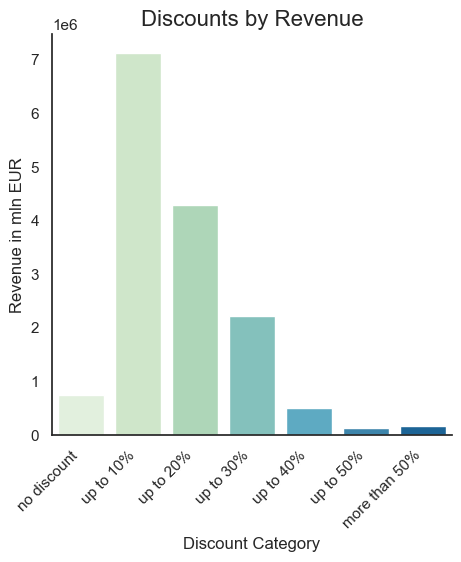

In [140]:
import matplotlib.pyplot as plt
sns.catplot(data=disc_cat, x="discount_category", y="total_price", kind="bar", palette="GnBu").set_xticklabels(rotation=45, horizontalalignment='right')
plt.title("Discounts by Revenue", fontsize=16)
plt.xlabel('Discount Category')
plt.ylabel('Revenue in mln EUR')

Text(-8.805555555555555, 0.5, 'Units sold')

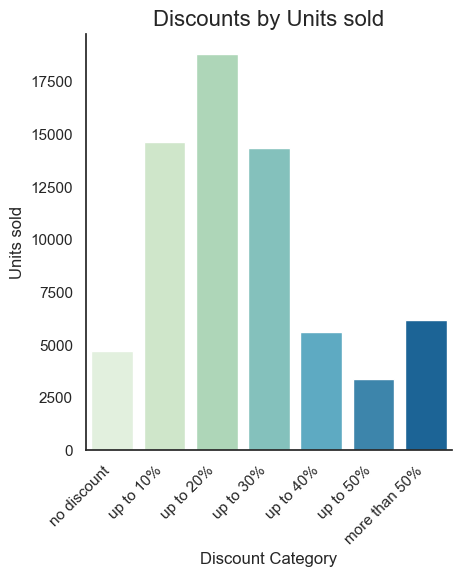

In [142]:
import matplotlib.pyplot as plt
sns.catplot(data=disc_cat, x="discount_category", y="product_quantity", kind="bar", palette="GnBu").set_xticklabels(rotation=45, horizontalalignment='right')
plt.title("Discounts by Units sold", fontsize=16)
plt.xlabel('Discount Category')
plt.ylabel('Units sold')

# Average discounts for top 5 categories showing most revenues AND highest value per sku
Desktop
Laptop
Data Storage
Smartphones
Monitors

In [11]:
total["week"] = total.datetime.dt.weekofyear
total["year"] = total.datetime.dt.year
top5_per_week = total[total.category.isin(["Desktop", "Laptop", "Data Storage", "Smartphones", "Monitor"])].groupby(by=["week","year","category"]).agg({"total_price": "sum", "discount": "mean"}).reset_index()

C:\Users\danie\AppData\Local\Temp\ipykernel_17700\4060010119.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  total["week"] = total.datetime.dt.weekofyear


In [155]:
top5_per_week.head()

,week,year,category,total_price,discount
0,1,2017,Data Storage,44795.73,13.62
1,1,2017,Desktop,45630.80,14.17
2,1,2017,Laptop,34522.86,8.45
3,1,2017,Smartphones,1843.99,-6.72
4,1,2018,Data Storage,57246.66,17.05


# with phones

In [19]:
total["top5"] = np.where(total.category.isin(["Desktop", "Laptop", "Data Storage", "Smartphones", "Monitor"]), "Top 5", "else")
total.head()

,order_id,product_quantity,sku,date,unit_price_cl,total_price,name,price,short,category,datetime,total_paid,long,price_diff,discount,week,year,top 5,top5
0,300713,1,OTT0133,2017-01-02,19.99,19.99,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 Black,34.99,OTT,Cases/ Device Protection,2017-01-02 16:51:26,54.99,Otterbox,15.00,42.87,1,2017,else,else
1,305815,1,OTT0133,2017-01-09,19.99,19.99,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 Black,34.99,OTT,Cases/ Device Protection,2017-01-09 15:59:02,37.98,Otterbox,15.00,42.87,2,2017,else,else
2,317155,1,OTT0133,2017-01-30,18.99,18.99,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 Black,34.99,OTT,Cases/ Device Protection,2017-01-30 08:38:08,40.88,Otterbox,16.00,45.73,5,2017,else,else
3,321977,1,OTT0133,2017-02-09,19.99,19.99,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 Black,34.99,OTT,Cases/ Device Protection,2017-02-09 18:06:51,37.97,Otterbox,15.00,42.87,6,2017,else,else
4,361272,1,OTT0133,2017-06-01,19.99,19.99,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 Black,34.99,OTT,Cases/ Device Protection,2017-06-01 15:21:54,23.98,Otterbox,15.00,42.87,22,2017,else,else


# taking complete top 5 (without subgroups)

In [21]:
top5_week = total[total.top5 == "Top 5"]

In [70]:
test2 = total[["category", "discount", "total_price", "year", "week"]].groupby(by= ["year", "week"]).agg({"discount": "mean"}).reset_index()
test2

,year,week,discount
0,2017,1,21.90
1,2017,2,26.07
2,2017,3,22.71
3,2017,4,26.93
4,2017,5,21.58
5,2017,6,17.63
6,2017,7,20.31
7,2017,8,18.28
8,2017,9,19.70
9,2017,10,16.92


In [54]:
total.total_price.sum() 15 173 559.049999999

15173559.049999999

In [60]:
total["total_weekly_disc"] = ""
total.loc[((total.week == test2.week) & (total.year == test2.year)), "total_weekly_disc"] = test2.total_weekly_disc
#total.total_weekly_disc.nunique()

ValueError: Can only compare identically-labeled Series objects

In [ ]:
test2 = total[["week", "year", "discount", "total_price", "category"]].groupby("week").agg({"discount":"mean"})

In [77]:
t5w = top5_week.groupby(
    by=["year","week"]).agg(
    {"total_price": "sum", "discount": "mean"}).reset_index()
t5w["overall_discount"] = test2.discount
t5w.head(5)

,year,week,total_price,discount,overall_discount
0,2017,1,137853.64,13.03,21.90
1,2017,2,159068.00,15.27,26.07
2,2017,3,138487.33,16.82,22.71
3,2017,4,209930.74,17.55,26.93
4,2017,5,180108.41,15.36,21.58


Text(1268.5381944444441, 0.5, 'Revenue in mln EUR')

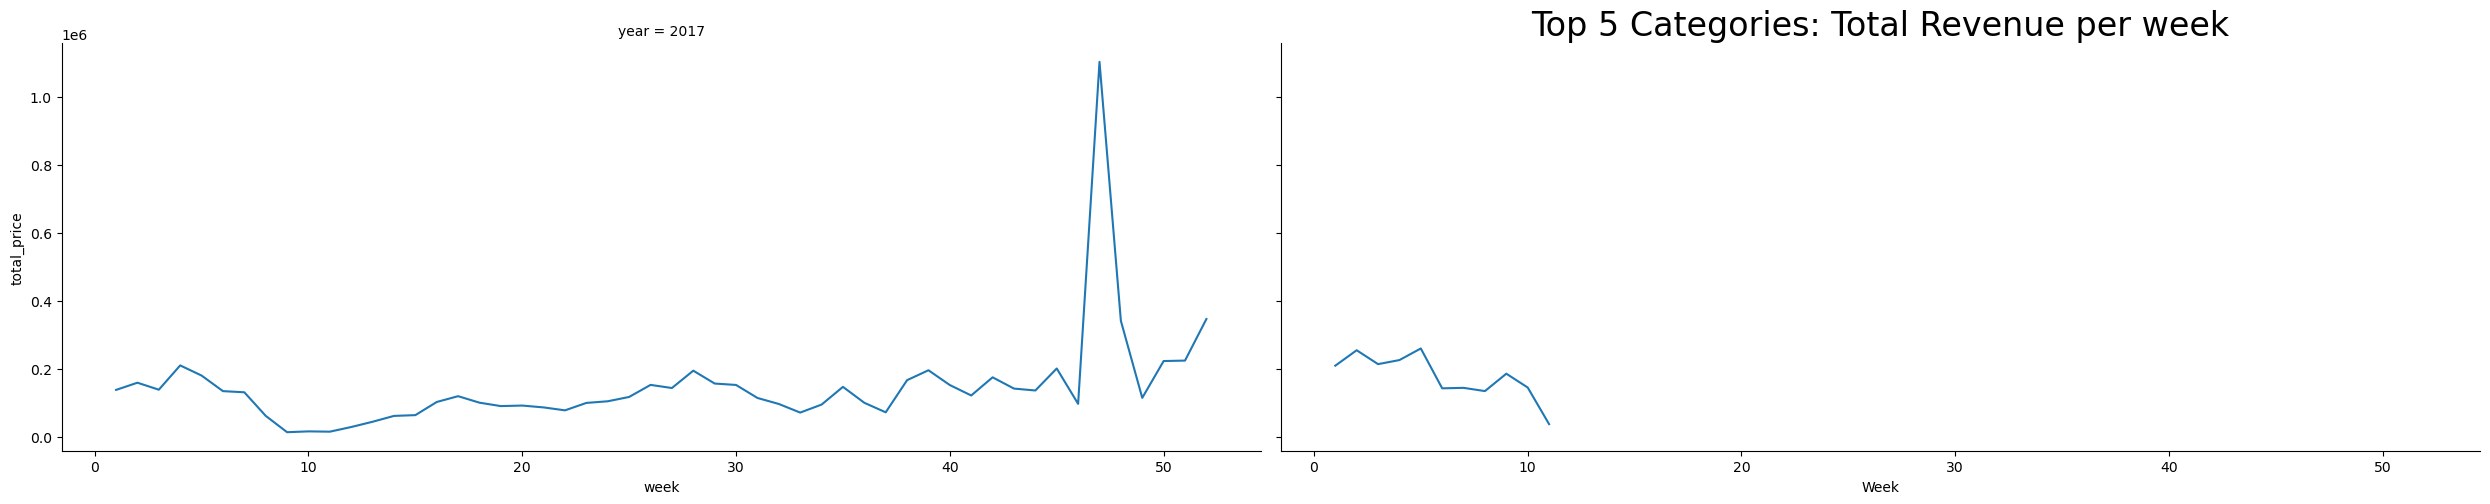

In [78]:
sns.relplot(data=t5w, x="week", y="total_price", col="year", kind="line", aspect=2.5, palette="GnBu")
plt.title("Top 5 Categories: Total Revenue per week", fontsize=24)
plt.xlabel('Week')
plt.ylabel('Revenue in mln EUR')

Text(1268.5381944444441, 0.5, 'Average Discount in %')

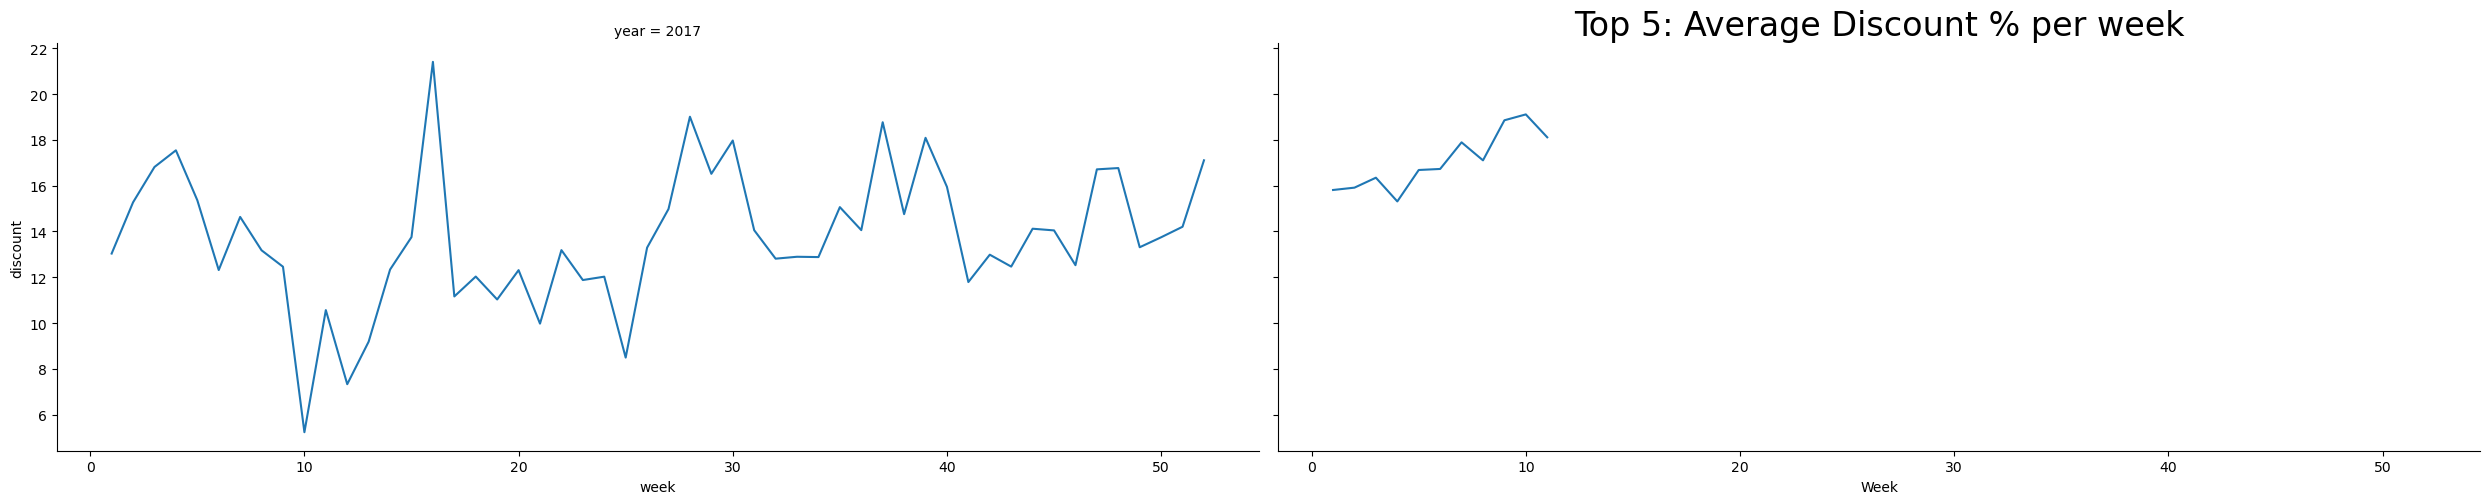

In [80]:
sns.relplot(data=t5w, x="week", y="discount", col="year", kind="line", aspect=2.5, palette="GnBu")
plt.title("Top 5: Average Discount % per week", fontsize=24)
plt.xlabel('Week')
plt.ylabel('Average Discount in %')

# total weekly discount plot

In [31]:
totdisc = total.groupby(by=["week", "year"]).agg({"discount":"mean"}).reset_index()

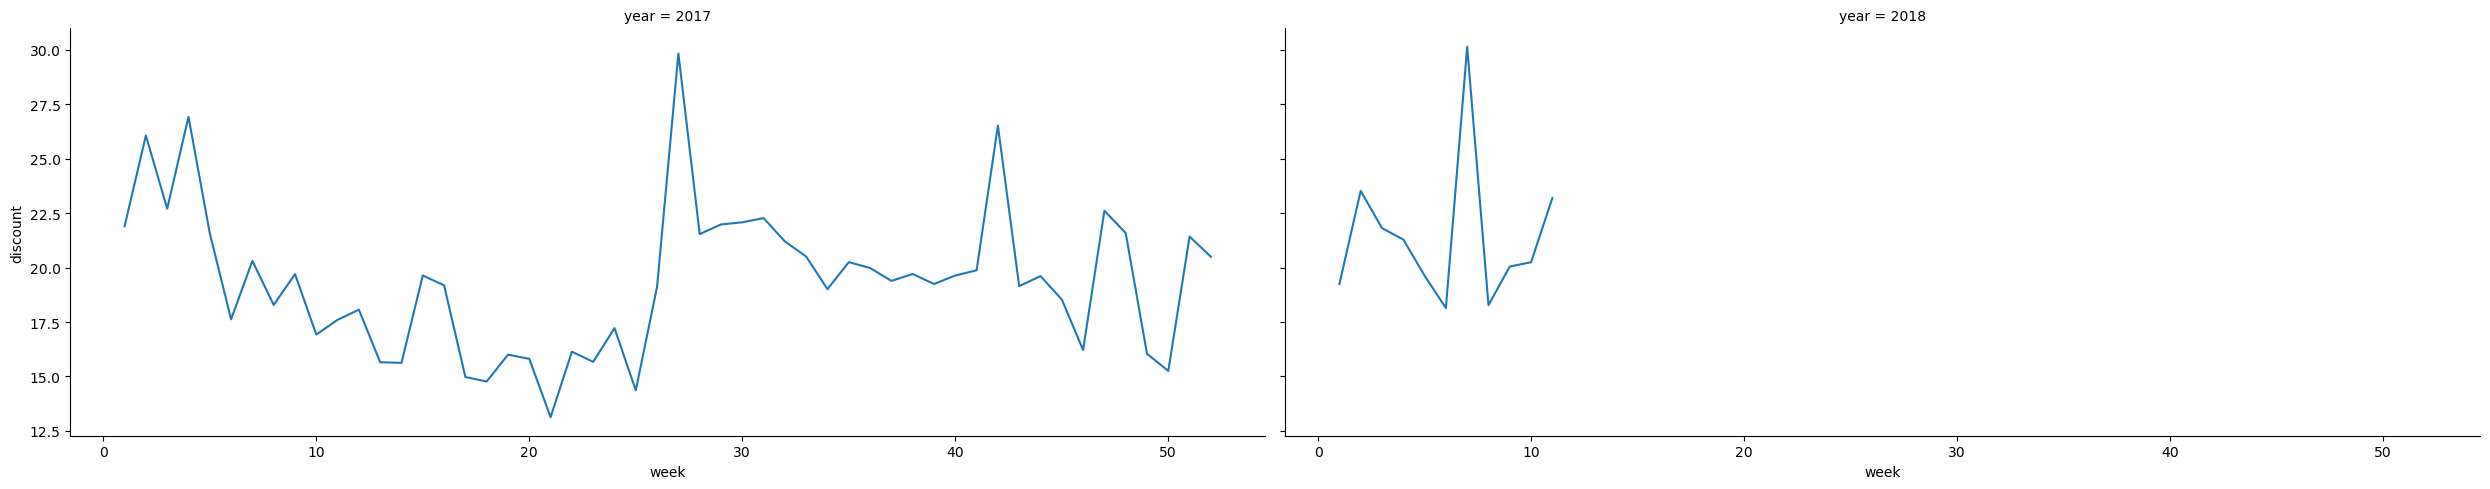

In [32]:
sns.relplot(data=totdisc, x="week", y="discount", col="year", kind="line", aspect=2.5, palette="GnBu")

# comparing top5-product-group-discounts to total portfolio-disocunts

In [ ]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(top5_per_week_no_phone.week, top5_per_week_no_phone.total_price)
ax2.plot(top5_per_week_no_phone.week, top5_per_week_no_phone.discount, color="red" )

ax1.set_xlabel('week')
ax1.set_ylabel('Revenues', color='g')
ax2.set_ylabel('avg. Discount in %', color='b')

plt.figure(figsize=(100, 1))
plt.show()

In [13]:
top5_per_week_g = total[total.category.isin(["Desktop", "Laptop", "Data Storage", "Smartphones", "Monitor"])].groupby(
    by=["week","year","category"]).agg(
    {"total_price": "sum", "discount": "mean"}).reset_index()

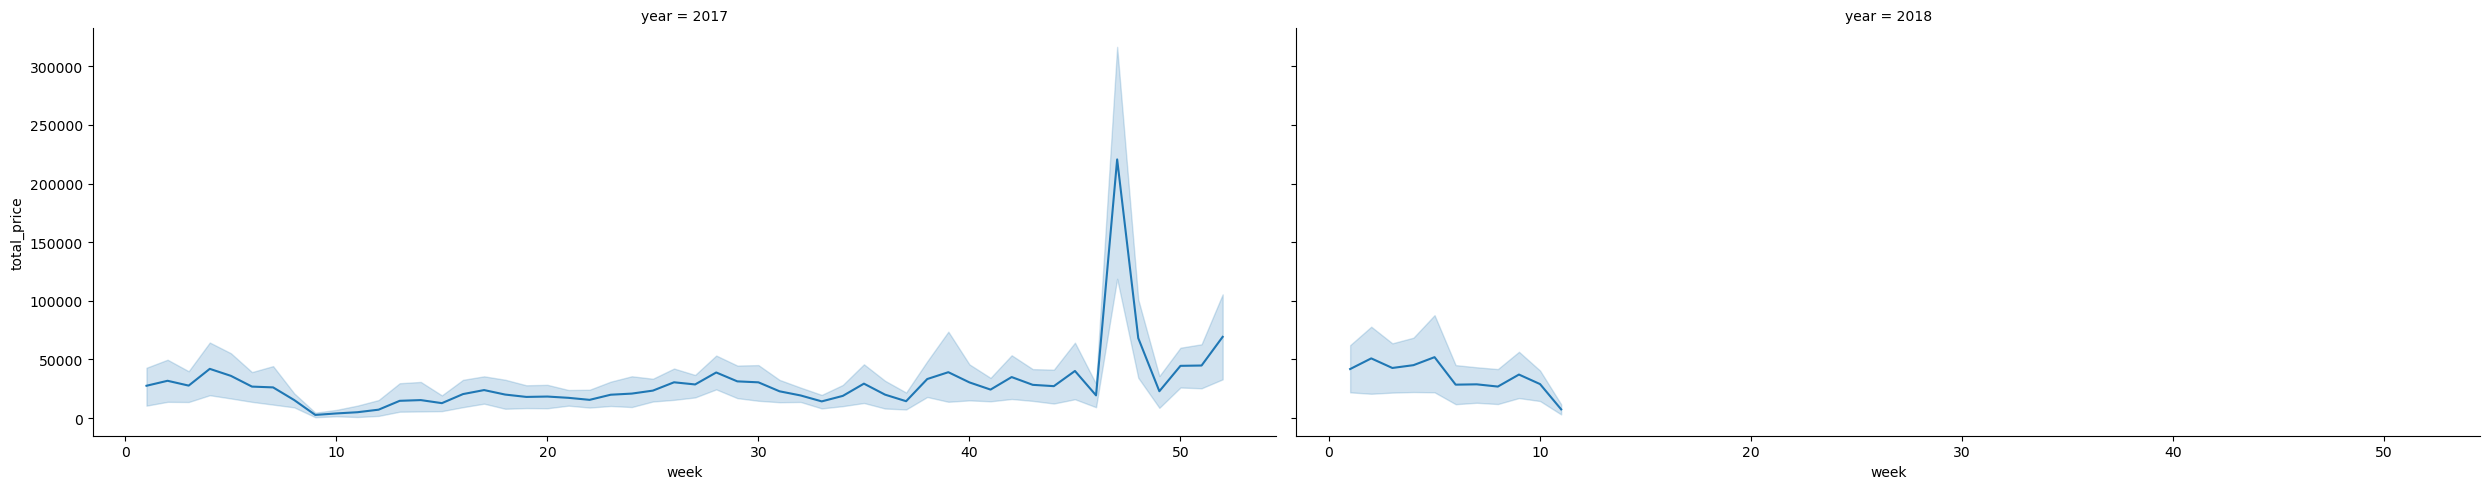

In [14]:
sns.relplot(data=top5_per_week_g, x="week", y="total_price", col="year", kind="line", aspect=2.5, palette="GnBu")

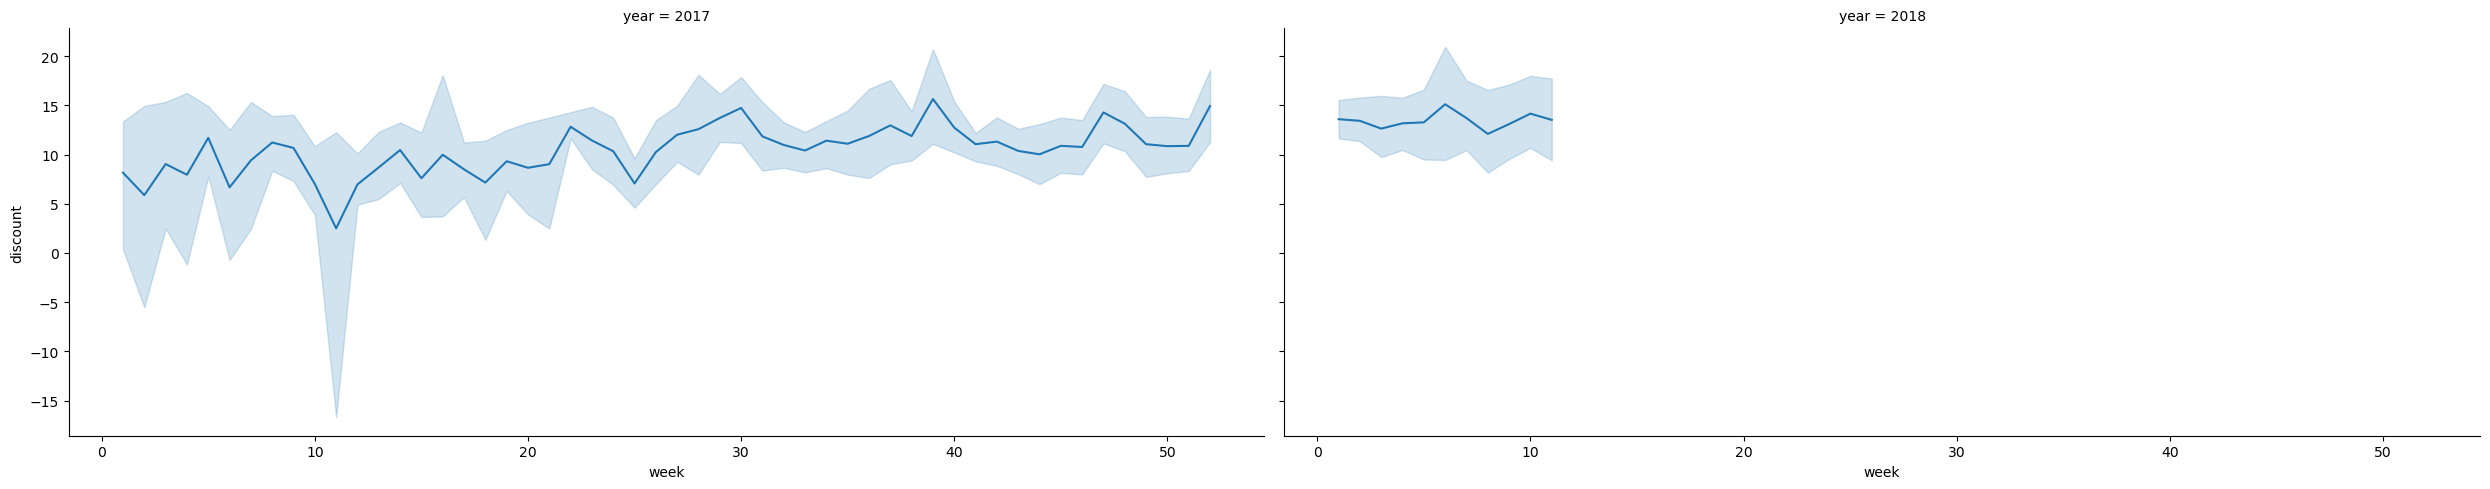

In [15]:
sns.relplot(data=top5_per_week_g, x="week", y="discount", col="year", kind="line", aspect=2.5, palette="GnBu")

In [167]:
top5_per_week_no_phone = total[total.category.isin(["Desktop", "Laptop", "Data Storage", "Monitor"])].groupby(by=["week","year","category"]).agg({"total_price": "sum", "discount": "mean"}).reset_index()

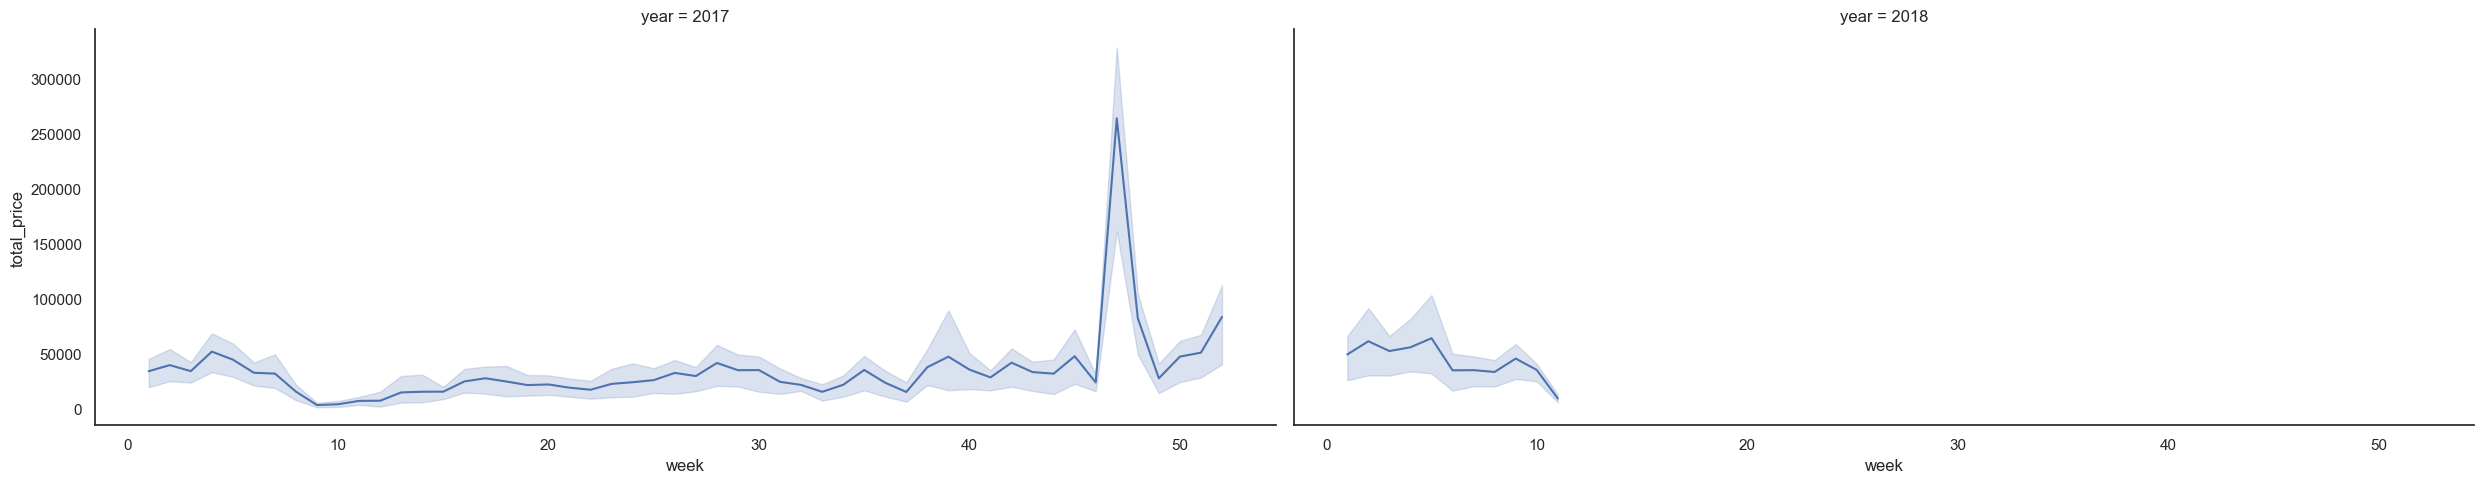

In [178]:
sns.relplot(data=top5_per_week_no_phone, x="week", y="total_price", col="year", kind="line", aspect=2.5, palette="GnBu")

In [82]:
top5_per_week_no_phone_units = total[total.category.isin(["Desktop", "Laptop", "Data Storage", "Monitor"])].groupby(by=["week","year","category"]).agg({"product_quantity": "sum", "discount": "mean"}).reset_index()
top5_per_week_no_phone_units.head()

,week,year,category,product_quantity,discount
0,1,2017,Data Storage,325,13.62
1,1,2017,Desktop,20,14.17
2,1,2017,Laptop,19,8.45
3,1,2017,Monitor,32,11.29
4,1,2018,Data Storage,300,17.05


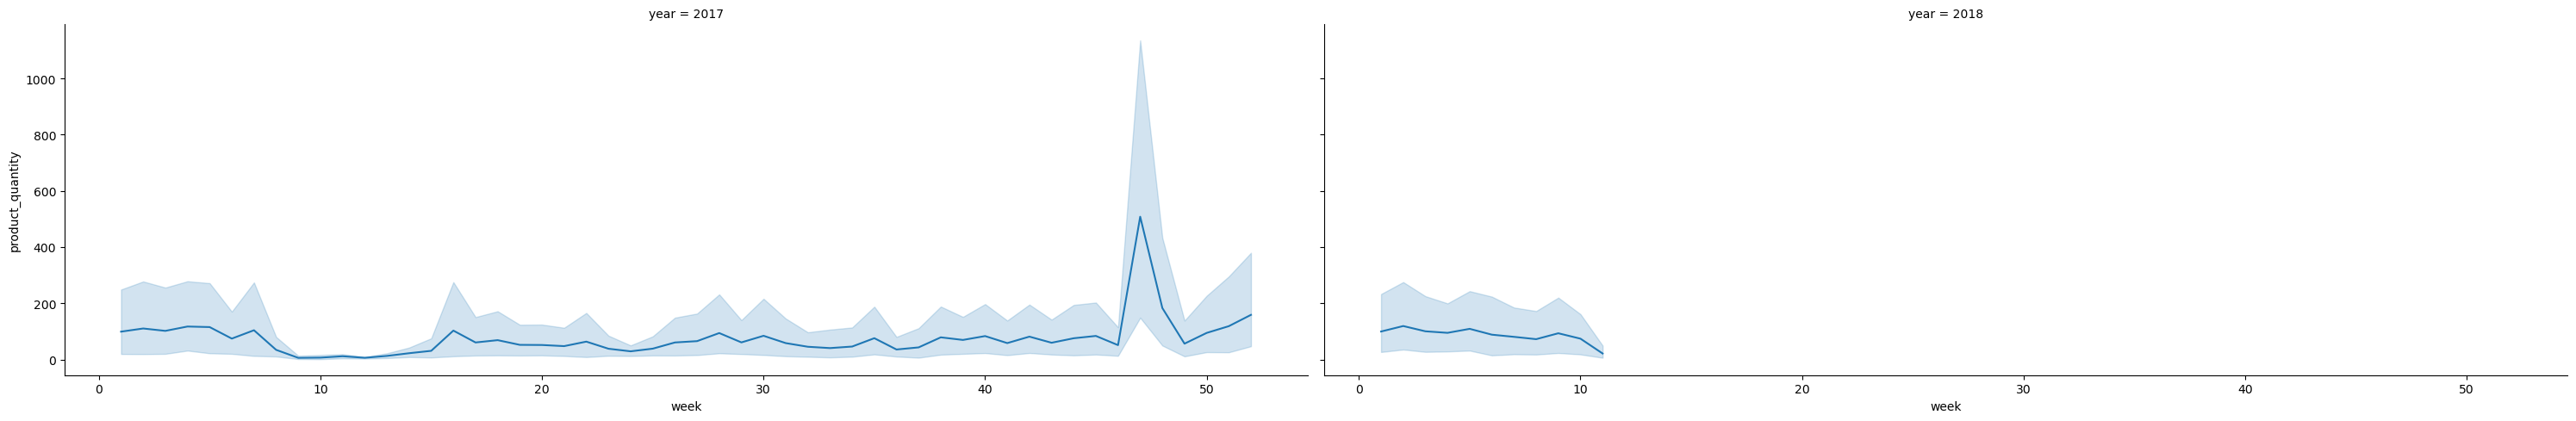

In [83]:
sns.relplot(data=top5_per_week_no_phone_units, x="week", y="product_quantity", col="year", kind="line", aspect=3, palette="GnBu")

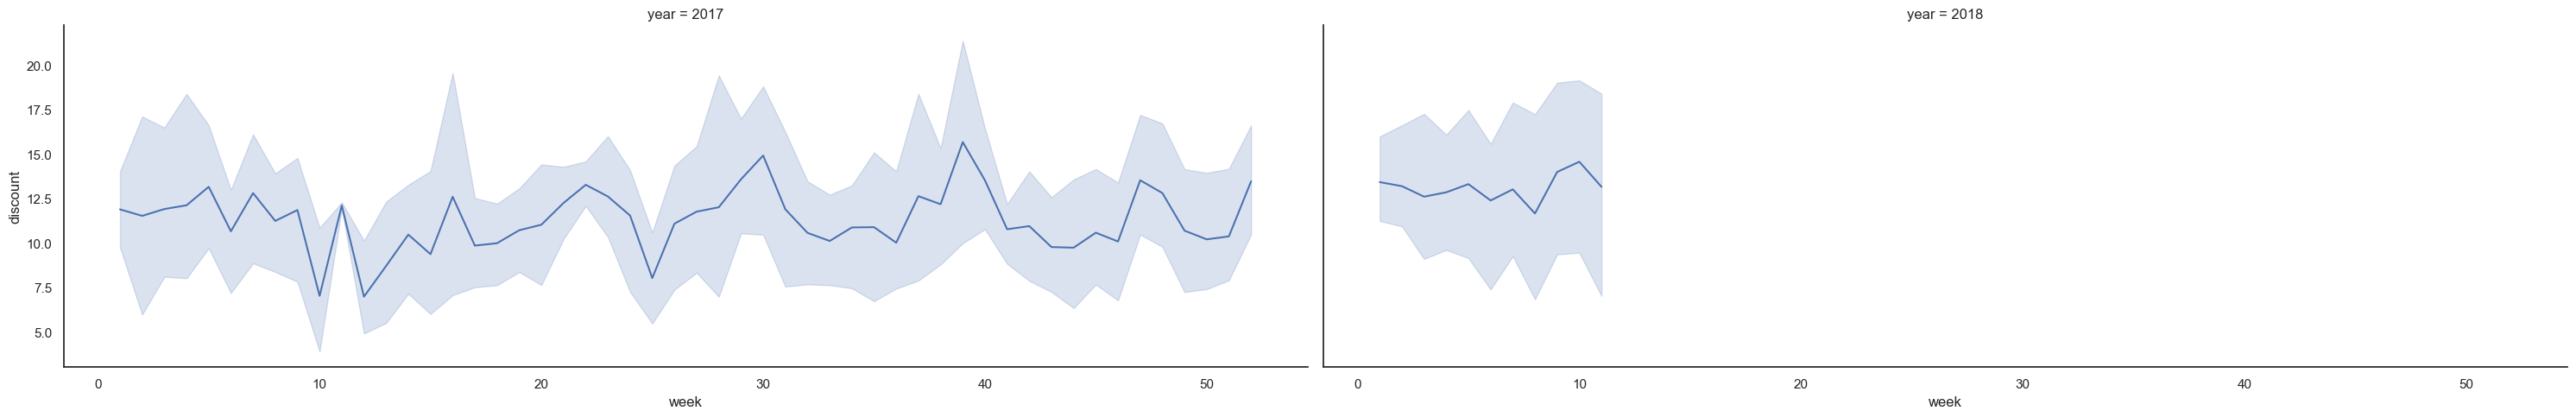

In [171]:
sns.relplot(data=top5_per_week_no_phone, x="week", y="discount", col="year", kind="line", aspect=3, palette="GnBu")

In [33]:
top5_per_week_no_phone = total[total.category.isin(
    ["Desktop", "Laptop", "Data Storage", "Monitor"])].groupby(
    by=["week","year","category"]).agg(
    {"total_price": "sum", "discount": "mean"}).reset_index()

top5_per_week_no_phone.head()

,week,year,category,total_price,discount
0,1,2017,Data Storage,44795.73,13.62
1,1,2017,Desktop,45630.80,14.17
2,1,2017,Laptop,34522.86,8.45
3,1,2017,Monitor,11060.26,11.29
4,1,2018,Data Storage,57246.66,17.05


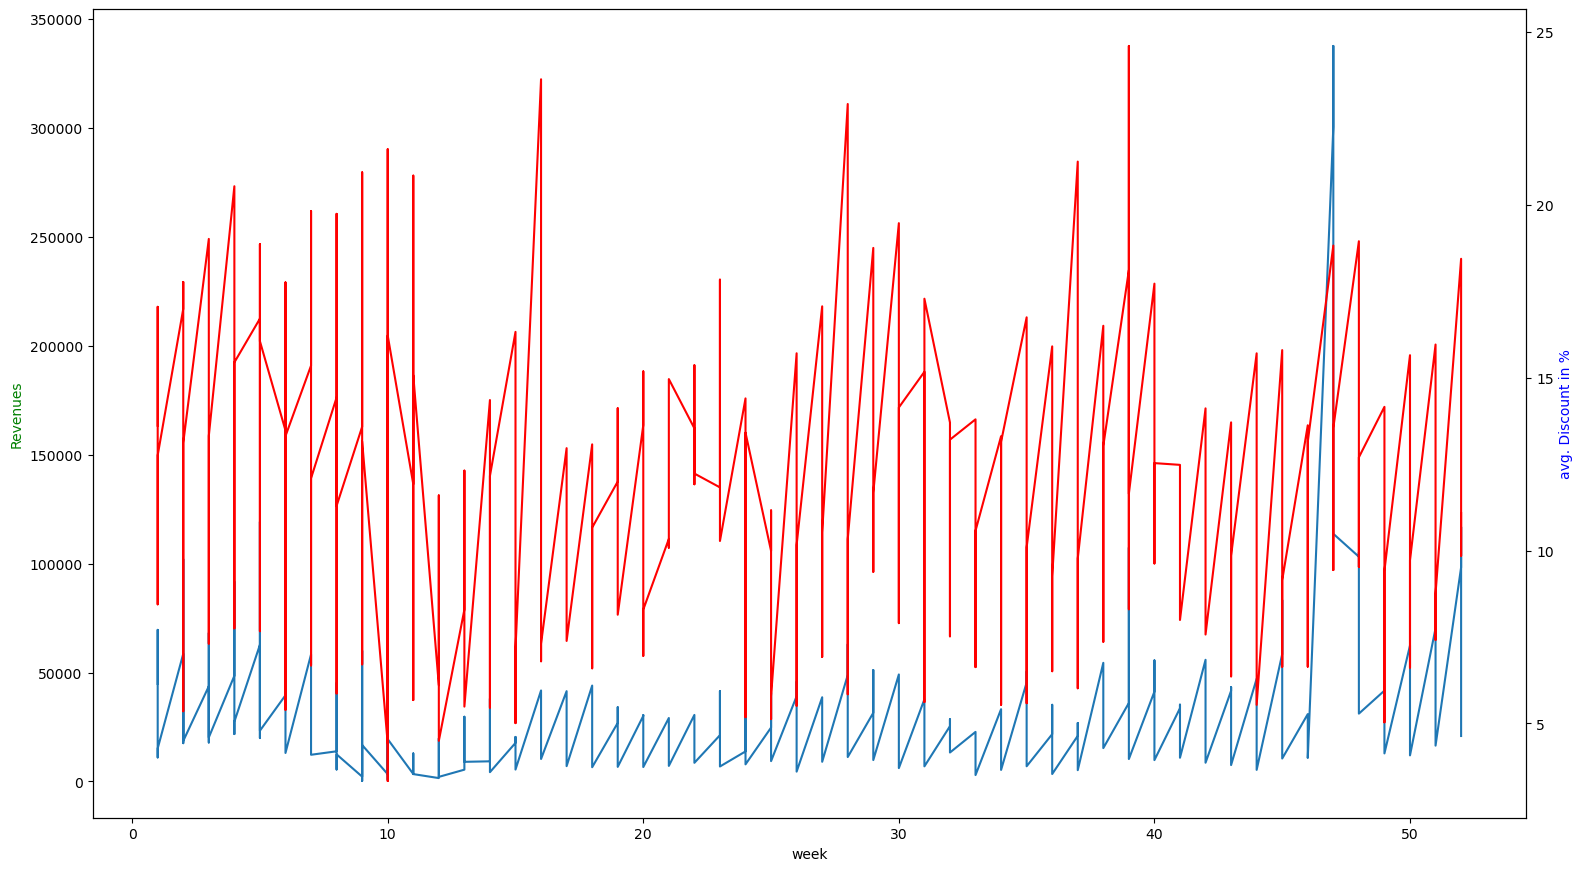

<Figure size 640x480 with 0 Axes>

In [55]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(top5_per_week_no_phone.week, top5_per_week_no_phone.total_price)
ax2.plot(top5_per_week_no_phone.week, top5_per_week_no_phone.discount, color="red" )

ax1.set_xlabel('week')
ax1.set_ylabel('Revenues', color='g')
ax2.set_ylabel('avg. Discount in %', color='b')

plt.figure(fig.set_size_inches(18.5, 10.5))
plt.show()

In [ ]:
total[total.category.isin(["Desktop", "Laptop", "Data Storage", "Smartphones", "Monitors"])]

# Discounts given per category

In [103]:
total["disc"] = total.discount > 0
total["disc"].value_counts()
t = total.copy()
t["retail"] = np.where(
    t.disc == False, "Retail Price", "Discount"
)
t.drop("disc", axis=1, inplace = True)

disc_prod = t.groupby(by=["category", "retail"]).agg({"product_quantity": "sum"}).reset_index()#
disc_prod

#sns.catplot(data=disc_prod, y="category", x="product_quantity", hue="retail", aspect=1, kind="bar")

,category,retail,product_quantity
0,Accessories/ Add Ons,Discount,4505
1,Accessories/ Add Ons,Retail Price,267
2,Adaptors/ Cables,Discount,5630
3,Adaptors/ Cables,Retail Price,221
4,Audio,Discount,3506
5,Audio,Retail Price,124
6,Camera,Discount,191
7,Camera,Retail Price,9
8,Cases/ Device Protection,Discount,8055
9,Cases/ Device Protection,Retail Price,235


In [106]:
disc_prod.product_quantity = pd.to_numeric(disc_prod.product_quantity)

disc_prod.set_index('category').T.plot(kind='bar', stacked=True)

TypeError: no numeric data to plot

Text(0, 0.5, 'Number of Products sold')

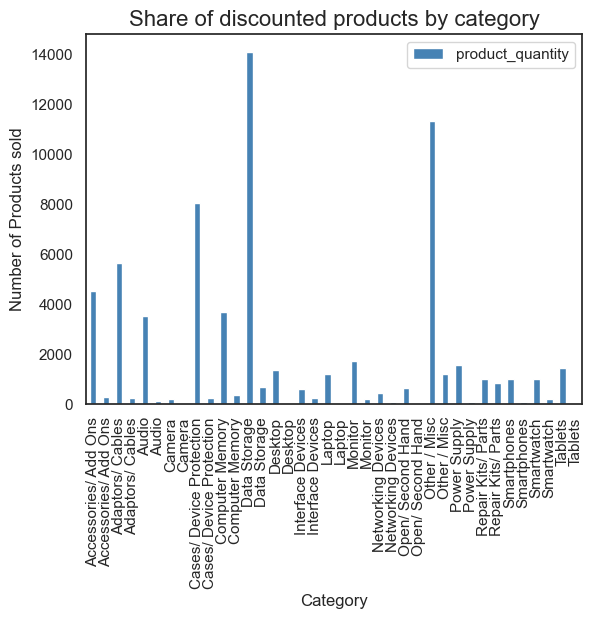

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
disc_prod.set_index('category').plot(kind='bar', stacked=True, color=['steelblue', 'red'])
plt.title("Share of discounted products by category", fontsize=16)
plt.xlabel('Category')
plt.ylabel('Number of Products sold')

# cleaning outliers from discounts

In [ ]:
neg_discount = total[total.discount < 0]
#neg_discount.info() #10846 entries
total.drop(total.loc[total.sku.isin(neg_discount.sku), :].index, axis=0, inplace=True) # ---->removing negative discounts
#olines_prod.info() #203862 entries

In [ ]:
discount_Q1 = total.discount.quantile(0.25)
discount_Q3 = total.discount.quantile(0.75) 
discount_IQR = discount_Q3-discount_Q1
#(olines_prod.discount > (discount_Q3 + discount_IQR * 1.5)).value_counts() #13545 true, dropping these in next step
total.drop(total.loc[total.discount > (discount_Q3 + discount_IQR * 1.5), :].index, axis=0, inplace=True)

In [ ]:
dist_discounts_adj = total.groupby("date").agg({"discount": "mean"}).reset_index()
sns.relplot(data=dist_discounts_adj, x="date", y="discount", kind="line", aspect=3)

In [ ]:
cyberweek = total[total.datetime.between("2017-11-20 00:00:00", "2017-11-26 23:59:59")]
cw = cyberweek.groupby(by=["category", "date"]).agg({"total_price": "sum"}).reset_index()
#cw_olp.reset_index()
#cw.order_id.nunique() #4109 orders during cyberweek
#total.order_id.nunique() #45542 orders in total
#(cw.order_id.nunique()/total.order_id.nunique())*100 # 9.02% of total orders during cyberweek
sns.relplot(data=cw, x="date", y="total_price", hue="category", aspect=3, kind="line")

# christmas

In [ ]:
christmas = total[total.datetime.between("2017-11-28 00:00:00", "2017-12-23 23:59:59")]
xm = christmas.groupby(by=["category", "date"]).agg({"total_price": "sum"}).reset_index()
sns.relplot(data=xm, x="date", y="total_price", hue="category", aspect=3, kind="line")

In [ ]:
#cyberweek.total_price.sum() #1 785 095.91
#total.total_price.sum() #15 173 559.05
(cyberweek.total_price.sum()/total.total_price.sum())*100 # 11.76% of revenues created during cyberweek

# average discount per category

In [ ]:
disc_per_cat = total.groupby(by=["date", "category"]).agg({"discount": "mean"}).reset_index()
sns.relplot(data=disc_per_cat, x="date", y="discount", hue="category", kind="line", height=8, aspect=3)

In [ ]:
cw_discounts = cyberweek.groupby(by= ["date", "category"]).agg({"total_price": "sum", "discount": "mean"})
cw_discounts
sns.relplot()

# Q1 comparison

In [ ]:
q1_no_b = total_no_b[(total_no_b.datetime.between("2017-01-01 00:00:00", "2017-03-31 23:59:59")) | (total_no_b.datetime.between("2018-01-01 00:00:00", "2018-03-31 23:59:59"))]
q1_no_b.groupby()

# cyber monday

In [ ]:
#total_no_b.loc[total_no_b.date == "2017-11-27", :]
(total_no_b.date == "2017-11-27").value_counts()

In [ ]:
total.groupby("date").agg({"total_price": "sum"}).sort_values("total_price").tail(7)

In [ ]:
o.total_paid.sum() #15 910 079.24